# 5.1: Introduction to python visualization

Visualizing your data is **extremely** important to be proficient at as a data scientist. Why?

1. You need to be able to explore your data **visually**. This is essential!
    
    - You need to get an intuition for your data.
    - Visualization should **always** be done before you start modeling your data. 
    - If you model data without visualizing it first, you are asking to run into problems down the line!
    
    
2. You will be always be required to report on your findings working as a data scientist. 
    
    - Technical coworkers such as other data scientists or analysts will want to get an intuition for the data too
    - Visualization will make your findings compelling and intuitive to non-technical coworkers.

---

### Lesson overview

We are going to cover the basics of visualizing data in python using some popular python packages. Tableau is also important in this class but this notebook is just for the python plotting.

- **matplotlib** is the low-level but powerful standard plotting package for python.
- **seaborn** builds on top of matplotlib. It is much easier to use and looks better, but is more restricted in functionality.
- **plotly** is a fancy plotting library with very nice visuals but very different syntax than matplotlib.

--- 

We are going to load in the data with **pandas**. Don't worry about the functionality of pandas quite yet – we will be going over this package in much more detail next week.

---

### Installing plotly

#### [If you have installed plotly, skip to the import section!]

1. Go to https://plot.ly/
2. Make an account and sign in.
3. Open a terminal window:
    - In the terminal, type:
    
        ```bash
        $ pip install plotly
        ```
        
    - Make sure this is installed. Open ipython in the terminal:
    
        ```bash
        $ ipython
        ```
        
    - In ipython, type:
    
        ```python
        import plotly
        ```
        
    - If that runs without error, plotly is successfully installed.
    
4. To use plotly, you will need to set your "credentials" with your personal API key from the website. This will let you plot, and will also save your plots on the website as well.
    - Go to: https://plot.ly/settings/api
    - Copy the code in the "API KEY" section.
    - In your ipython notebook, you will insert the following code to set your plotly api key:
    
        ```python
        import plotly.tools as tls
        tls.set_credentials_file(username='YOUR_USERNAME', api_key='YOUR_API_KEY')
        ```
        
The cell below has the code for how I set my api key.

In [150]:
import plotly.tools as tls
tls.set_credentials_file(username='kiefer.katovich', api_key='3i7uomp004')

---

### Import the required packages

Don't forget to run the cell below!

In [151]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

### Load and show the data

This data is salary for professors across sexes.

[If you get a warning, ignore it!]

In [152]:
salary = pd.read_csv('../assets/datasets/salary.csv')
salary.columns = ['gender', 'professor_rank', 'years_in_job', 'degree_level', 'years_since_degree', 'yearly_salary']

In [153]:
salary.head()

,gender,professor_rank,years_in_job,degree_level,years_since_degree,yearly_salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


### Using matplotlib

We'll start out with matplotlib and go through a particular chart step by step, fine tuning it.

Matplotlib is by far the most complicated and hardest to understand of the three. If you feel confused that's fine – I feel confused most of the time I use matplotlib too. Remember: Google is your friend.

---

**M.1** Let's plot out the years in job vs. the yearly salary as a scatter plot:

In [154]:
years_in_job = salary.years_in_job.values
yearly_salary = salary.yearly_salary.values

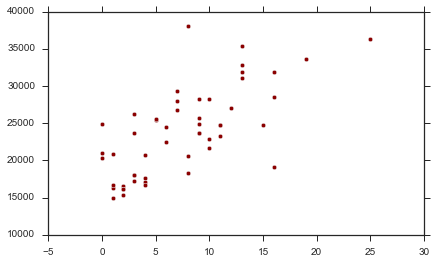

In [155]:
# The x-axis variable comes first, then the y-axis variable.
# The c keyword argument is for the color of the data.
plt.scatter(years_in_job, yearly_salary, c='darkred')

---

**M.2** The figure is a little small. Let's make it bigger:

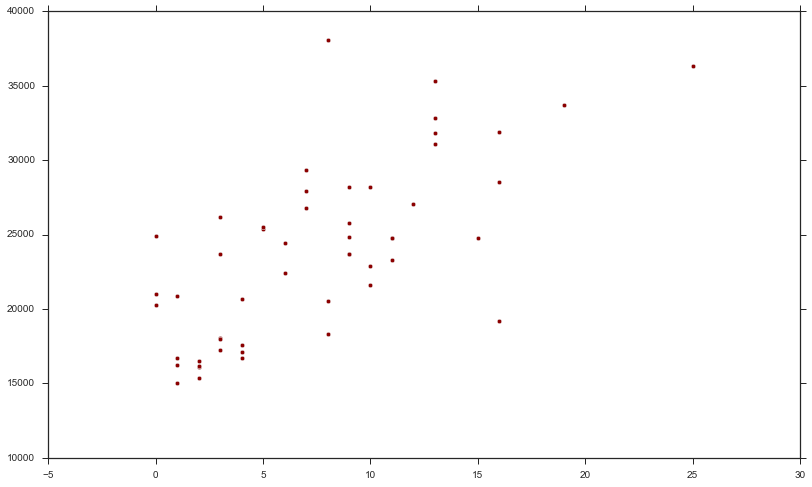

In [156]:
# Figure size is in inches (width, height).
plt.figure(figsize=(12,8))
plt.scatter(years_in_job, yearly_salary, c='darkred')

---

**M.3** It would be nice to have some labels for the figure. Add a title and axis labels:

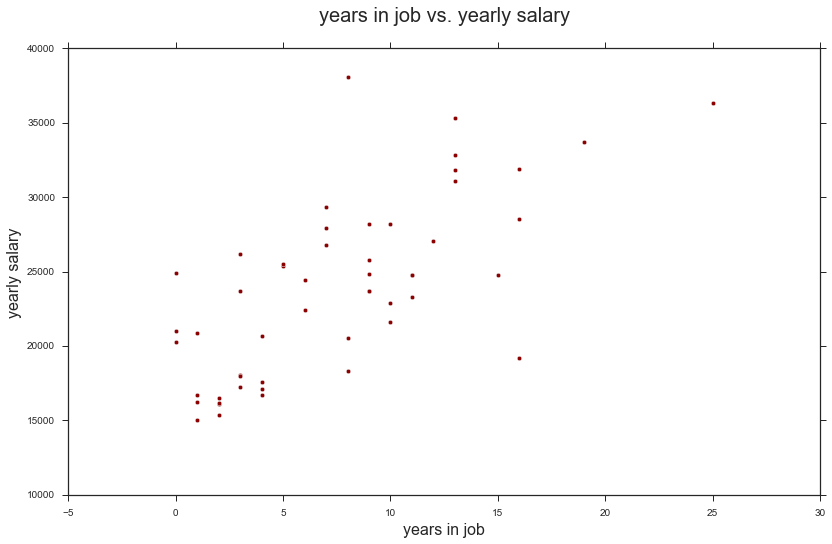

In [157]:
fig = plt.figure(figsize=(12,8))

axes = fig.gca()

axes.scatter(years_in_job, yearly_salary, c='darkred')

axes.set_title('years in job vs. yearly salary\n', fontsize=20)
axes.set_xlabel('years in job', fontsize=16)
axes.set_ylabel('yearly salary', fontsize=16)

---

**M.4** Make the points a bit bigger and also change the style to be like nate silver's fivethirtyeight blog!

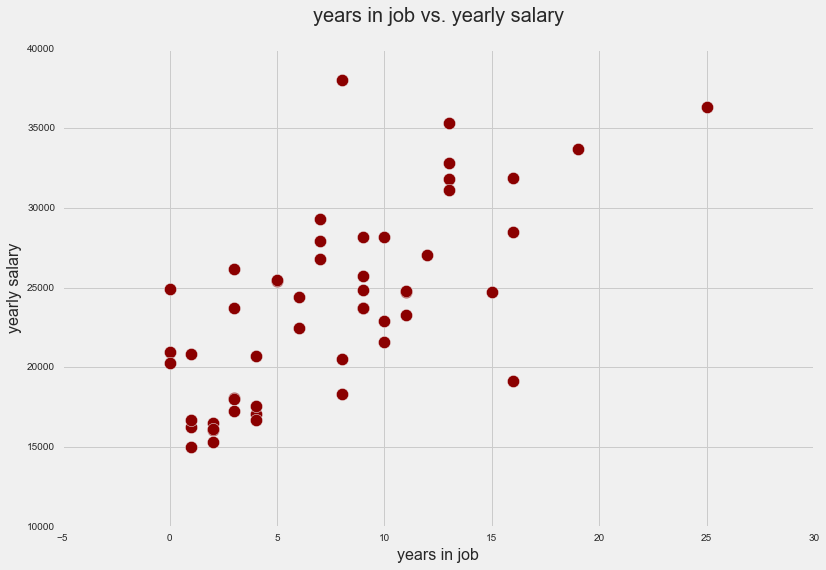

In [158]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12,8))

axes = fig.gca()

axes.scatter(years_in_job, yearly_salary, c='darkred', s=150)

axes.set_title('years in job vs. yearly salary\n', fontsize=20)
axes.set_xlabel('years in job', fontsize=16)
axes.set_ylabel('yearly salary', fontsize=16)

---

**M.5** We can look at a 3rd and 4th dimension represented by color and shape of the points. We should add a legend too!

Pull out gender and professor rank from the data.

In [159]:
gender = salary.gender.values
rank = salary.professor_rank.values

In [160]:
print(np.unique(rank))

['assistant' 'associate' 'full']


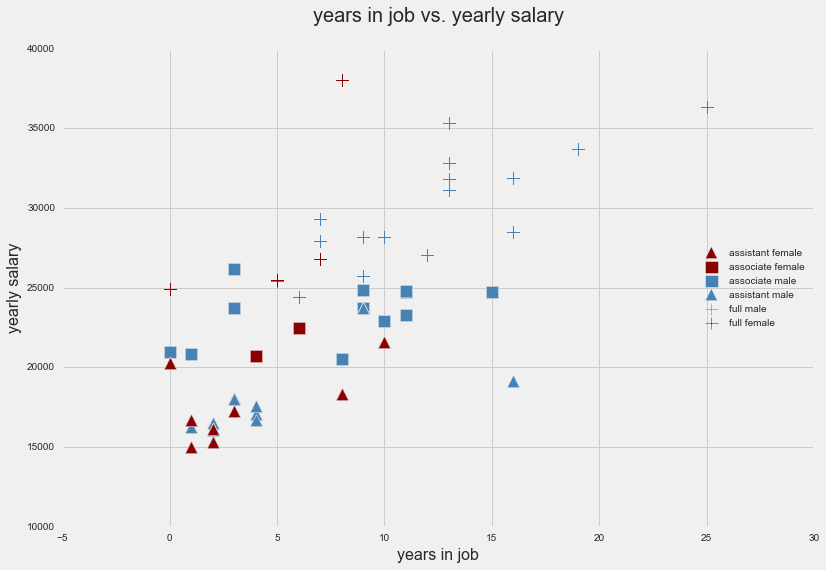

In [161]:
colors = ['darkred' if g == 'female' else 'steelblue' for g in gender]

# + == +, s == square, ^ == upwards triangle
point_shapes = ['+' if r == 'full' else 's' if r == 'associate' else '2' for r in rank]

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()

for g in gender:
    
    if g == 'female':
        color = 'darkred'
    elif g == 'male':
        color = 'steelblue'
        
    for r in rank:
        
        if r == 'full':
            point_marker = '+'
        elif r == 'associate':
            point_marker = 's'
        elif r == 'assistant':
            point_marker = '^'
            
        current_years = [y for y, g_, r_ in zip(years_in_job, gender, rank) if g_ == g and r_ == r]
        current_salaries = [s for s, g_, r_ in zip(yearly_salary, gender, rank) if g_ == g and r_ == r]

        axes.scatter(current_years, current_salaries, c=color, marker=point_marker, s=150,
                     label=' '.join([r, g]))

axes.set_title('years in job vs. yearly salary\n', fontsize=20)
axes.set_xlabel('years in job', fontsize=16)
axes.set_ylabel('yearly salary', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'center right')

### Using seaborn

As you can see, matplotlib can start sucking to use pretty quickly. It's powerful, but _very_ obtuse.

Luckily, seaborn lets you plot a lot of common types of visualizations with really minimal overhead. The official website essentially has all the information and examples you need:

- The website: https://stanford.edu/~mwaskom/software/seaborn/
- Check out the gallery of examples: https://stanford.edu/~mwaskom/software/seaborn/examples/index.html
- The API documentation has full info: https://stanford.edu/~mwaskom/software/seaborn/api.html

---

**S.1** We've seen scatter plots with matplotlib so far. What if we are interested in distributions? Let's plot the _joint distribution_ of years_in_job and yearly_salary with seaborn.

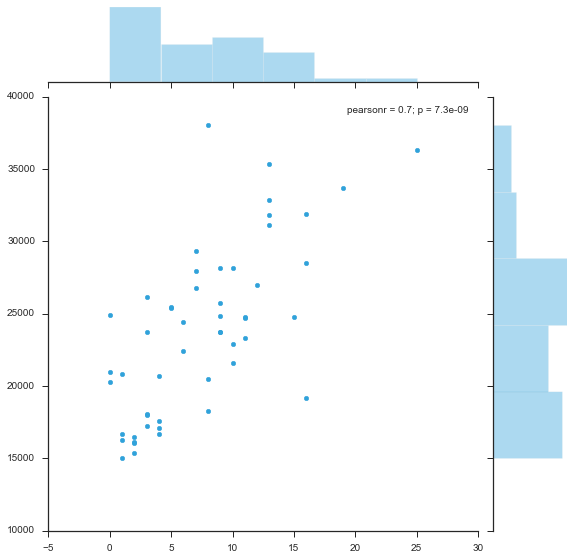

In [162]:
sns.set_style('ticks')

sns.jointplot(years_in_job, yearly_salary, kind='scatter', size=8)

Pretty nice!

---

**S.2** We can use the ```kind``` keyword argument to modify the plot, like adding a regression line. 

[NOTE: The annotation is small. Can we fix this? Yes, but it's not straightforward because matplotlib kiiiinda sucks. Check out the creator's answer: https://github.com/mwaskom/seaborn/issues/364]

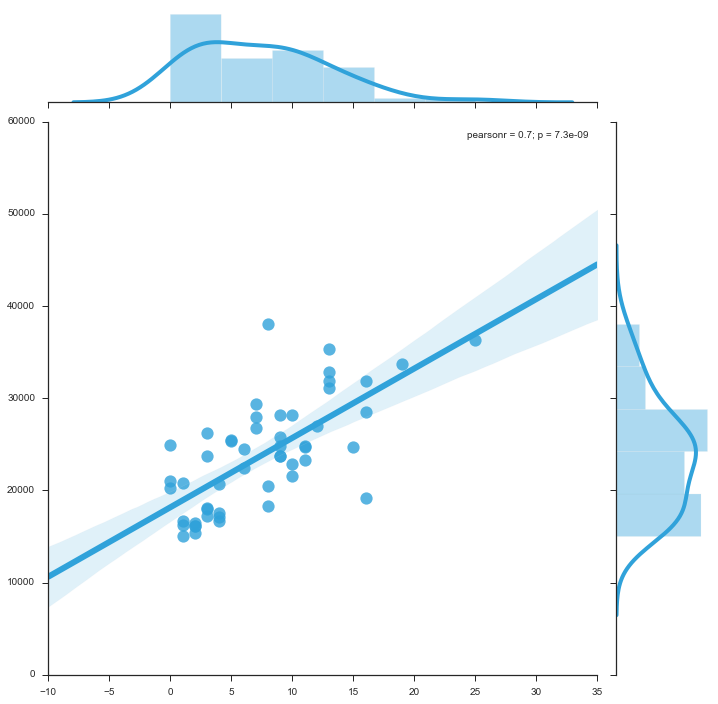

In [163]:
sns.jointplot(years_in_job, yearly_salary, kind='reg', size=10, joint_kws={'scatter_kws': {'s': 150}})

There's something in seaborn called a "pairplot" that is a really nice way of visualizing the last plot we did in matplotlib in a different way.

---

#### "long" vs. "wide" format aside

We've been using data so far in something called **wide format**. There is another popular way of organizing data called **"long format**. What is long format?

Right now your columns of interest look like this:

    gender, rank, years, salary
    female, full, 12, 30000
    male, full, 18, 50000
    ...
    
But in long format, we only have **one column of numeric values!** It is going to look like this:

    gender, rank, variable, value
    female, full, years, 12
    female, full, salary, 30000
    male, full, years, 18
    male, full, salary, 50000
    ...
    
The original format is called **wide** format. There are, as with everything, pros and cons to each.

Pandas has a nice convenience function for this called melt which can convert wide to long:

In [164]:
subset = salary[['gender','professor_rank','years_in_job','yearly_salary']]

subset_long = pd.melt(subset,
                      id_vars=['gender','professor_rank'],
                      value_vars=['years_in_job','yearly_salary'],
                      var_name='variable',
                      value_name='value')


In [165]:
subset_long.head()

,gender,professor_rank,variable,value
0,male,full,years_in_job,25
1,male,full,years_in_job,13
2,male,full,years_in_job,10
3,female,full,years_in_job,7
4,male,full,years_in_job,19


Voila!

---

**S.3** Use the pairplot function to visualize the variables in a different way.

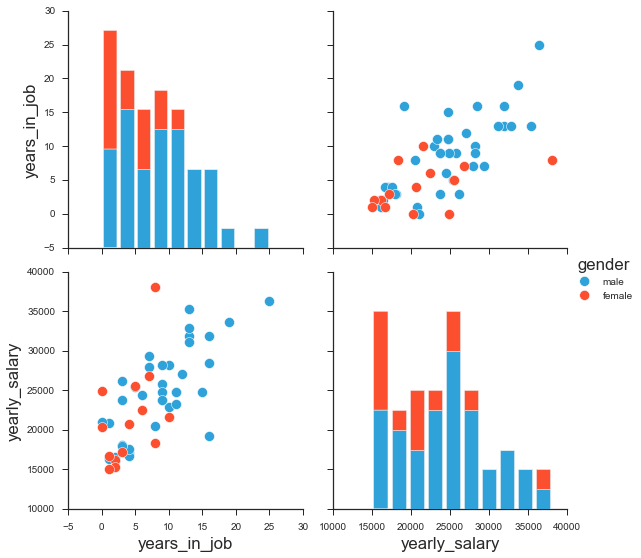

In [166]:
sns.pairplot(subset, hue='gender', size=4, plot_kws={'s': 100})

### plotly

The last one we are going to cover is plotly. We're only going to make one chart with it, which is the final chart we made with matplotlib.

Plotly has a significantly different syntax than matplotlib (and seaborn by extension). It is more verbose, more understandable, and more explicit. They are also somewhat interactive as well.

If you are a beginner to all three, I would recommend using seaborn and plotly, and avoiding matplotlib since it is complicated and confusing.

---

**P.1** Create the 5-D chart we made in matplotlib, comparing years in job on the x-axis, yearly salary on the y-axis, colors indicating gender, and markers indicating the rank of the position. 

In [167]:
import plotly.plotly as py
import plotly.graph_objs as go

male_full = go.Scatter(
    x = years_in_job[(gender == 'male') & (rank == 'full')],
    y = yearly_salary[(gender == 'male') & (rank == 'full')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"x",
            'opacity':0.65},
    name='Full Male'
)

male_associate = go.Scatter(
    x = years_in_job[(gender == 'male') & (rank == 'associate')],
    y = yearly_salary[(gender == 'male') & (rank == 'associate')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"square",
            'opacity':0.65},
    name='Associate Male'
)

male_assistant = go.Scatter(
    x = years_in_job[(gender == 'male') & (rank == 'assistant')],
    y = yearly_salary[(gender == 'male') & (rank == 'assistant')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"triangle-up",
            'opacity':0.65},
    name='Assistant Male'
)

female_full = go.Scatter(
    x = years_in_job[(gender == 'female') & (rank == 'full')],
    y = yearly_salary[(gender == 'female') & (rank == 'full')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'darkred',
            'symbol':"x",
            'opacity':0.65},
    name='Full Female'
)

female_associate = go.Scatter(
    x = years_in_job[(gender == 'female') & (rank == 'associate')],
    y = yearly_salary[(gender == 'female') & (rank == 'associate')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'darkred',
            'symbol':"square",
            'opacity':0.65},
    name='Associate Female'
)

female_assistant = go.Scatter(
    x = years_in_job[(gender == 'female') & (rank == 'assistant')],
    y = yearly_salary[(gender == 'female') & (rank == 'assistant')],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'darkred',
            'symbol':"triangle-up",
            'opacity':0.65},
    name='Assistant Female'
)

data = [male_full, male_associate, male_assistant,
        female_full, female_associate, female_assistant]

layout = go.Layout(
    title='Years in Job vs. Yearly Salary',
    hovermode='closest',
    xaxis={
        'title':'Years in Job',
        'ticklen':5,
        'gridwidth':2,
    },
    yaxis={
        'title':'Yearly Salary',
        'ticklen':5,
        'gridwidth':2,
    },
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Years in Job vs. Yearly Salary')